# Heart Disease Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_excel('heart_disease_data.xlsx')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,0,2,162,548,1,1,200,1,1.8,2,0,0,0
1,57,1,3,169,126,0,0,165,0,1.8,0,3,1,1
2,43,0,0,109,512,1,1,185,0,1.4,0,0,0,1
3,71,1,3,183,473,1,0,106,1,0.3,0,0,2,1
4,36,0,0,183,315,1,1,96,1,0.1,1,0,2,1


In [2]:
# Null check
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  target    200 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.0 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0


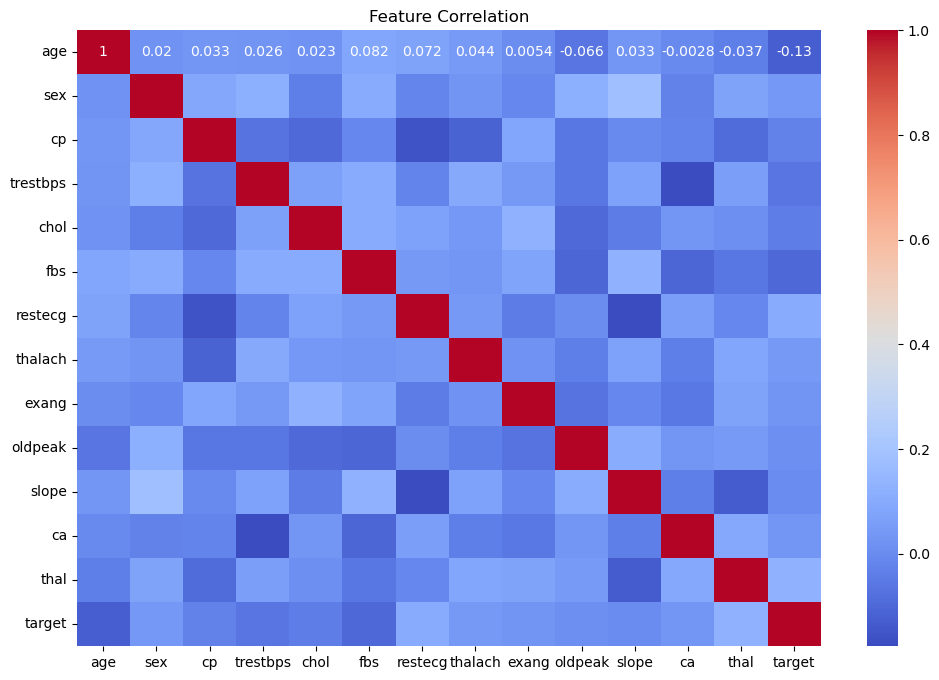

In [3]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [5]:
# Separating features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.425
[[ 6 17]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        23
           1       0.39      0.65      0.49        17

    accuracy                           0.42        40
   macro avg       0.45      0.45      0.42        40
weighted avg       0.45      0.42      0.40        40



In [7]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.575
[[14  9]
 [ 8  9]]
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        23
           1       0.50      0.53      0.51        17

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.58      0.57      0.58        40



In [8]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.575
[[11 12]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.50      0.71      0.59        17

    accuracy                           0.57        40
   macro avg       0.59      0.59      0.57        40
weighted avg       0.61      0.57      0.57        40

